# Databricks Workspace Features Audit

## Overview

This notebook provides a **comprehensive inventory** of all features and capabilities enabled in your Databricks workspace. The output includes detailed reports showing workspace configuration flags, Unity Catalog resources, compute capabilities, collaboration tools, security features, and data sharing configurations.

**✨ Production-ready workspace auditing with parallel execution, retry logic, export capabilities, and historical tracking.**

---

## Performance Modes

### 🚀 Quick Mode (<1 second)
**Recommended for**: Daily checks, quick status reviews, testing, **interactive development**

* Workspace configuration flags only
* No resource enumeration (jobs, warehouses, etc.)
* Fastest execution
* **Skips**: Unity Catalog, Compute, Collaboration, Security resource counts
* **To enable**: Set `USE_FULL_MODE = False` in Cell 3

### 🔍 Full Mode (10-30 seconds)
**Recommended for**: Complete audits, compliance reviews, comprehensive analysis, **scheduled jobs**

* **ALL** feature categories enabled
* Complete workspace coverage including:
  * Workspace configuration flags
  * Unity Catalog resources (catalogs, external locations, storage credentials)
  * Compute resources (SQL warehouses, serverless, cluster policies)
  * Collaboration tools (repos, jobs, pipelines, model serving)
  * Security features (groups, service principals, system tables)
  * Data sharing (Delta Sharing, volumes)
* **🤖 AUTOMATIC IN JOB MODE**: Jobs always run in Full Mode for comprehensive audits
* **To enable**: Set `USE_FULL_MODE = True` in Cell 3 (default)

### ⚙️ Custom Mode (Variable)
**Recommended for**: Specific use cases, targeted audits, **interactive sessions**

* Set `USE_FULL_MODE = True` and configure individual enable/disable flags in Cell 3
* Fine-tune which feature categories to check
* Balance performance vs coverage

**To select a mode**: Edit Cell 3 and set `USE_FULL_MODE = True` (Full) or `False` (Quick)

---

## What This Code Does

### 1. **Workspace Configuration Flags**
* Checks 18 validated workspace configuration settings
* Identifies enabled/disabled features:
  * Personal access tokens
  * Web terminal access
  * DBFS file browser
  * Verbose audit logs
  * Workspace filesystem
  * Git integration
  * And more...
* Provides descriptions for each configuration flag

### 2. **Unity Catalog Resources** (Full Mode only)
* **Catalogs**: Count and list of all Unity Catalog catalogs
* **External Locations**: Cloud storage access configurations
* **Storage Credentials**: Authentication credentials for cloud storage
* **System Catalog**: Audit logs, billing, and lineage availability
* Validates Unity Catalog enablement status

### 3. **Compute Capabilities** (Full Mode only)
* **SQL Warehouses**: Total count and serverless detection
* **Serverless SQL**: Identifies serverless-enabled warehouses
* **Cluster Policies**: Governance policies for cluster configuration
* **Instance Pools**: Pre-provisioned compute pools
* **Active Clusters**: Currently running interactive clusters (optional, can be slow)

### 4. **Collaboration & Workflows** (Full Mode only)
* **Repos (Git Integration)**: Git repository count and status
* **Jobs/Workflows**: Scheduled and triggered job count
* **Delta Live Tables**: DLT pipeline count
* **MLflow Experiments**: Active experiment tracking
* **Registered Models**: ML models in Model Registry
* **Model Serving**: Real-time serving endpoint count

### 5. **Security & Governance** (Full Mode only)
* **Users**: Total and active user counts
* **Groups**: User group count for permission management
* **Service Principals**: Non-human identity count
* **Secret Scopes**: Secure credential storage count
* **IP Access Lists**: Network access control status

### 6. **Data Sharing & Marketplace** (Full Mode only)
* **Delta Sharing (Providers)**: Outbound data sharing count
* **Delta Sharing (Recipients)**: External consumer count
* **Data Providers**: Inbound data source count

### 7. **Workspace Capabilities** (Full Mode only)
* **Notification Destinations**: Alert integration count (Slack, email, webhooks, PagerDuty)
* **Lakeview Dashboards**: Modern BI dashboard count

### 8. **Feature Analysis & Visualization**
* **Category Summaries**: Features grouped by category
* **Enabled vs Available**: Clear distinction of active features
* **Visual Charts**: Feature distribution and enabled/disabled breakdown
* **Export Capabilities**: Excel and Delta table exports with audit metadata

---

## Key Features

✓ **Automatic Job Mode**: Jobs always run Full Mode for comprehensive audits  
✓ **Simple Configuration**: Single `USE_FULL_MODE` variable to switch between modes  
✓ **Performance Presets**: Quick Mode (<1s) or Full Mode (10-30s)  
✓ **Parallel Execution**: ThreadPoolExecutor with configurable workers (10 concurrent API calls)  
✓ **Retry Logic**: Automatic retry with exponential backoff for transient API failures  
✓ **Timeout Handling**: Prevents hanging on slow API calls (30s timeout)  
✓ **Progress Tracking**: Real-time progress updates during execution  
✓ **Execution Statistics**: Tracks API calls, failures, retries, success rates  
✓ **Error Resilience**: Continues execution even if some checks fail  
✓ **Feature Descriptions**: Every feature includes a clear description  
✓ **Category Organization**: Features grouped by logical categories  
✓ **Multiple Export Formats**: Excel workbooks and Delta tables  
✓ **Historical Tracking**: Delta table export for trend analysis  
✓ **Audit Metadata**: Timestamps, execution time, API statistics  
✓ **Configuration Validation**: Validates settings before execution  
✓ **Job Mode Detection**: Automatically detects scheduled vs interactive execution  
✓ **Serverless Detection**: Automatically detects compute type and optimizes accordingly  
✓ **Compute-Aware Optimization**: Adapts behavior for serverless vs traditional clusters  
✓ **Visual Analytics**: Feature distribution charts and enabled/disabled breakdown  

---

## Configuration

### Execution Mode (Cell 3):
* `USE_FULL_MODE = True` - Complete audit with all resources (10-30 seconds) **[DEFAULT]**
* `USE_FULL_MODE = False` - Fast config-only checks (<1 second)
* `IS_JOB_MODE` - Auto-detected (scheduled job vs interactive)
* `IS_SERVERLESS` - Auto-detected (serverless vs traditional cluster)
* `TIMEZONE` - Timezone for timestamps (default: 'America/New_York')

### Performance Settings (Cell 3):
* `MAX_WORKERS = 10` - Parallel API calls (1-20)
* `MAX_RETRIES = 3` - Number of retries for failed API calls
* `RETRY_DELAY = 1` - Seconds to wait between retries
* `API_TIMEOUT = 30` - Timeout for API calls in seconds

### Feature Category Selection (Cell 3):
**For FULL MODE only:**
* `ENABLE_UNITY_CATALOG = True` - Check Unity Catalog resources
* `ENABLE_COMPUTE = True` - Check compute resources
* `ENABLE_COLLABORATION = True` - Check collaboration tools
* `ENABLE_SECURITY = True` - Check security features
* `ENABLE_DATA_SHARING = True` - Check data sharing features

### Optional Checks (Cell 3):
* `ENABLE_CLUSTER_CHECK = False` - Check active clusters (⚠️ can be VERY slow with 1000+ clusters)

### Export Settings (Cell 3):
* `ENABLE_EXCEL_EXPORT = False` - Export results to Excel workbook
* `ENABLE_DELTA_EXPORT = False` - Save to Delta table for historical tracking
* `EXPORT_PATH = "/dbfs/tmp/workspace_features_export"` - Export directory
* `DELTA_TABLE_NAME = "main.default.workspace_features_audit"` - Delta table name

---

## Output

### Interactive Display:
* **Main Table**: All features with Category, Feature, Description, Value, Enabled columns
* **Summary Table**: Feature counts by category (Total and Enabled)
* **Execution Statistics**: API calls, failures, retries, success rate, execution time
* **Visual Charts**: Feature distribution and enabled/disabled breakdown

### Excel Export (if enabled):
* **Features Sheet**: Complete feature inventory
* **Summary Sheet**: Execution statistics and metrics
* **Timestamped Files**: `workspace_features_YYYYMMDD_HHMMSS.xlsx`

### Delta Table Export (if enabled):
* **Historical Tracking**: Append-mode for trend analysis
* **Audit Metadata**: Timestamps, execution time, API statistics
* **Queryable History**: SQL queries for feature changes over time

---

## Usage

### Interactive Execution:
1. Configure settings in Cell 3 (mode, exports, feature categories)
2. Run Cell 3 to load configuration
3. Run Cell 4 to execute the feature audit
4. Run Cell 5 (optional) to export results
5. Run Cell 6 (optional) for visualizations
6. Review results in displayed tables

### Scheduled Job Execution:
1. Create a Databricks job pointing to this notebook
2. Job automatically runs in Full Mode (overrides `USE_FULL_MODE = False` if set)
3. Enable exports in Cell 3 for automated reporting
4. Results saved to Excel and/or Delta table
5. Schedule daily/weekly for compliance tracking

### Job Parameters (optional):
See Cell 12 for widget configuration examples:
* `use_full_mode` - Override USE_FULL_MODE setting ("true" or "false")
* `max_workers` - Override MAX_WORKERS setting
* `enable_excel_export` - Override ENABLE_EXCEL_EXPORT ("true" or "false")
* `enable_delta_export` - Override ENABLE_DELTA_EXPORT ("true" or "false")
* `enable_cluster_check` - Override ENABLE_CLUSTER_CHECK ("true" or "false")

---

## Performance Optimization Tips

### For Faster Execution:
1. **Use Quick Mode**: Set `USE_FULL_MODE = False` (<1 second)
2. **Reduce workers**: Set `MAX_WORKERS = 5` if API rate limits are hit
3. **Skip slow checks**: Keep `ENABLE_CLUSTER_CHECK = False` (default)
4. **Disable exports**: Set both exports to False for fastest execution

### For Complete Coverage:
1. **Use Full Mode**: Set `USE_FULL_MODE = True` (default)
2. **Enable all categories**: All ENABLE_* flags = True (default)
3. **Increase workers**: Set `MAX_WORKERS = 15-20` for faster parallel execution
4. **Enable cluster check**: Set `ENABLE_CLUSTER_CHECK = True` (only if needed)

### Compute Type Considerations:
* **Serverless**: Automatic memory management, no caching needed, fast startup
* **Traditional Cluster**: Manual memory management, caching available if needed
* **Detection**: Automatic - notebook adapts to compute type

---

## Troubleshooting

### High API Failure Rate:
* Check workspace permissions (need admin or appropriate read access)
* Verify network connectivity
* Review retry settings (increase MAX_RETRIES if transient failures)
* Check API rate limits (reduce MAX_WORKERS if hitting limits)

### Slow Execution:
* Use Quick Mode for faster results
* Disable ENABLE_CLUSTER_CHECK (can take 30+ minutes with many clusters)
* Reduce MAX_WORKERS if causing resource contention
* Check for slow API endpoints in execution statistics

### Missing Features:
* Verify USE_FULL_MODE = True for complete coverage
* Check ENABLE_* flags for specific categories
* Review API failures in execution statistics
* Ensure appropriate workspace permissions

### Export Failures:
* Verify export path exists and is writable
* Check Delta table permissions (CREATE TABLE required)
* Ensure openpyxl package is installed for Excel export
* Review error messages in execution output

---

## Version History

| Version | Date | Author | Changes |
|---------|------|--------|----------|
| v1.0 | 2026-02-12 | Brandon Croom | Initial production release: Comprehensive workspace feature auditing with 42+ feature checks across 8 categories; Parallel execution with ThreadPoolExecutor (10 concurrent workers); Retry logic with exponential backoff for API resilience; Quick Mode (config-only, <1s) and Full Mode (complete audit, 10-30s) support; Job mode detection with automatic Full Mode override; Serverless vs traditional cluster detection with compute-aware optimizations; Excel and Delta table exports with audit metadata; Execution statistics tracking (API calls, failures, retries, success rate); Configuration validation and error handling; Feature descriptions for all checks; Category-based organization; Visual analytics with matplotlib charts; Removed 14 invalid workspace config keys for 100% success rate; Added comprehensive resource checks: Unity Catalog (catalogs, external locations, storage credentials, system catalog), Compute (SQL warehouses, serverless detection, cluster policies, instance pools), Collaboration (jobs, repos, Delta Live Tables), ML/AI (model serving endpoints, registered models, MLflow experiments), Security (users, groups, service principals, secret scopes, IP access lists), Data Sharing (providers, recipients, data providers), Workspace Capabilities (notification destinations, Lakeview dashboards); Optional cluster check (disabled by default due to performance); Complete documentation with usage guide, troubleshooting, and best practices |

---

## Support

For questions or issues:
* **Performance**: Use Quick Mode for faster execution
* **Coverage**: Use Full Mode for complete feature inventory
* **Compute**: Notebook automatically detects and optimizes for serverless vs traditional clusters
* Review execution statistics for API failures and retry information
* Check configuration validation messages for setup issues
* Contact your Databricks administrator for permission issues

In [0]:
%pip install openpyxl --quiet

Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


In [0]:
# ============================================================================
# PRODUCTION CONFIGURATION
# ============================================================================

# Detect if running in job mode or interactive mode
try:
    dbutils.notebook.entry_point.getDbutils().notebook().getContext().currentRunId().isDefined()
    IS_JOB_MODE = True
except:
    IS_JOB_MODE = False

# Detect if running on serverless compute (most reliable method: try caching)
try:
    test_df = spark.range(1)
    test_df.cache()
    test_df.count()
    test_df.unpersist()
    IS_SERVERLESS = False
except Exception as e:
    # If caching fails with serverless error, we're on serverless
    IS_SERVERLESS = 'SERVERLESS' in str(e) or 'PERSIST TABLE is not supported' in str(e)

# ============================================================================
# TIMEZONE CONFIGURATION
# ============================================================================
# All timestamps will be displayed in this timezone
TIMEZONE = 'America/New_York'  # Eastern Time
# Common values: 'America/New_York' (Eastern), 'America/Chicago' (Central),
#                'America/Denver' (Mountain), 'America/Los_Angeles' (Pacific),
#                'UTC', 'Europe/London', etc.

# ============================================================================
# EXECUTION MODE: Choose your execution speed vs completeness
# ============================================================================

# Set to True for comprehensive audit (10-30 seconds)
# Set to False for quick config-only checks (<1 second)
USE_FULL_MODE = True

# FULL MODE (True):
# - Checks all workspace features
# - Enumerates all resources (Unity Catalog, Compute, Collaboration, Security)
# - Provides comprehensive feature inventory
# - Recommended for: Complete audits, compliance reviews, scheduled jobs

# QUICK MODE (False):
# - Checks only workspace config flags
# - Skips resource enumeration (jobs, warehouses, etc.)
# - Fastest execution
# - Recommended for: Daily checks, quick status reviews, testing

# ============================================================================
# PERFORMANCE SETTINGS
# ============================================================================
MAX_WORKERS = 10  # Parallel API calls (1-20)
MAX_RETRIES = 3  # Number of retries for failed API calls
RETRY_DELAY = 1  # Seconds to wait between retries
API_TIMEOUT = 30  # Timeout for API calls in seconds

# ============================================================================
# EXPORT SETTINGS
# ============================================================================
ENABLE_EXCEL_EXPORT = True  # Export results to Excel
ENABLE_DELTA_EXPORT = False  # Save to Delta table for historical tracking
EXPORT_PATH = "/dbfs/tmp/workspace_features_export"
DELTA_TABLE_NAME = "main.default.workspace_features_audit"

# ============================================================================
# RESOURCE TYPE SELECTION (for FULL MODE only)
# ============================================================================
ENABLE_UNITY_CATALOG = True
ENABLE_COMPUTE = True
ENABLE_COLLABORATION = True
ENABLE_SECURITY = True
ENABLE_DATA_SHARING = True

# ============================================================================
# OPTIONAL CHECKS (can be slow in large workspaces)
# ============================================================================
ENABLE_CLUSTER_CHECK = False  # ⚠️ Can be VERY slow if you have 1000+ clusters

# ============================================================================
# CONFIGURATION VALIDATION
# ============================================================================

def validate_configuration():
    """Validate configuration settings and resolve conflicts"""
    errors = []
    warnings = []
    
    # Validate execution mode
    if not isinstance(USE_FULL_MODE, bool):
        errors.append("USE_FULL_MODE must be a boolean (True or False)")
    
    # Validate performance settings
    if not isinstance(MAX_WORKERS, int) or MAX_WORKERS < 1 or MAX_WORKERS > 20:
        errors.append("MAX_WORKERS must be an integer between 1 and 20")
    
    if not isinstance(MAX_RETRIES, int) or MAX_RETRIES < 0:
        errors.append("MAX_RETRIES must be a non-negative integer")
    
    if not isinstance(RETRY_DELAY, (int, float)) or RETRY_DELAY < 0:
        errors.append("RETRY_DELAY must be a non-negative number")
    
    if not isinstance(API_TIMEOUT, (int, float)) or API_TIMEOUT < 1:
        errors.append("API_TIMEOUT must be at least 1 second")
    
    # Validate export settings
    if ENABLE_DELTA_EXPORT:
        if not DELTA_TABLE_NAME or '.' not in DELTA_TABLE_NAME:
            errors.append("DELTA_TABLE_NAME must be in format 'catalog.schema.table'")
        parts = DELTA_TABLE_NAME.split('.')
        if len(parts) != 3:
            errors.append(f"DELTA_TABLE_NAME must have exactly 3 parts (catalog.schema.table), got {len(parts)} parts")
    
    # Job mode override
    if IS_JOB_MODE and not USE_FULL_MODE:
        warnings.append("Job mode detected: Overriding to FULL MODE (jobs always run comprehensive audits)")
        globals()['USE_FULL_MODE'] = True
    
    # Cluster check warning
    if ENABLE_CLUSTER_CHECK:
        warnings.append("Cluster check enabled: This may take several minutes in large workspaces")
    
    return errors, warnings

# Run validation
config_errors, config_warnings = validate_configuration()

# Display warnings
if config_warnings:
    for warning in config_warnings:
        print(f"⚠️  WARNING: {warning}")

# Raise errors if any
if config_errors:
    error_msg = "Configuration validation failed:\n" + "\n".join(f"  ✖ {e}" for e in config_errors)
    raise ValueError(error_msg)

# ============================================================================
# UTILITIES
# ============================================================================

def log(message):
    """Print only in interactive mode"""
    if not IS_JOB_MODE:
        print(message)

def log_error(message):
    """Always print errors"""
    print(f"✖ ERROR: {message}")

def get_current_time_in_timezone():
    """Get current timestamp in configured timezone"""
    result = spark.sql(f"""
        SELECT from_utc_timestamp(current_timestamp(), '{TIMEZONE}') as current_time
    """).collect()[0]['current_time']
    return result

log("✓ Configuration loaded and validated")
log(f"Mode: {'JOB' if IS_JOB_MODE else 'INTERACTIVE'}")
log(f"Execution: {'FULL' if USE_FULL_MODE else 'QUICK'} MODE")
log(f"Compute: {'SERVERLESS' if IS_SERVERLESS else 'TRADITIONAL CLUSTER'}")
log(f"Timezone: {TIMEZONE}")
log(f"Performance: MAX_WORKERS={MAX_WORKERS}, MAX_RETRIES={MAX_RETRIES}")

if IS_SERVERLESS:
    log("\n⚡ Serverless optimizations:")
    log("  - Automatic memory management")
    log("  - Fast startup and scaling")
    log("  - No explicit caching needed")
else:
    log("\n🔧 Traditional cluster:")
    log("  - Manual memory management available")
    log("  - Persistent compute resources")
    log("  - Caching available if needed")

if ENABLE_CLUSTER_CHECK:
    log("⚠️  Cluster check enabled (may be slow)")
if ENABLE_EXCEL_EXPORT:
    log(f"📊 Excel export enabled: {EXPORT_PATH}")
if ENABLE_DELTA_EXPORT:
    log(f"💾 Delta export enabled: {DELTA_TABLE_NAME}")

{"ts": "2026-02-12 19:37:00.398", "level": "ERROR", "logger": "pyspark.sql.connect.logging", "msg": "GRPC Error received", "context": {}, "exception": {"class": "_InactiveRpcError", "msg": "<_InactiveRpcError of RPC that terminated with:\n\tstatus = StatusCode.INTERNAL\n\tdetails = \"[NOT_SUPPORTED_WITH_SERVERLESS] PERSIST TABLE is not supported on serverless compute. SQLSTATE: 0A000\"\n\tdebug_error_string = \"UNKNOWN:Error received from peer  {created_time:\"2026-02-12T19:37:00.39828172+00:00\", grpc_status:13, grpc_message:\"[NOT_SUPPORTED_WITH_SERVERLESS] PERSIST TABLE is not supported on serverless compute. SQLSTATE: 0A000\"}\"\n>", "stacktrace": [{"class": null, "method": "_analyze", "file": "/databricks/python/lib/python3.12/site-packages/pyspark/sql/connect/client/core.py", "line": "1811"}, {"class": null, "method": "__call__", "file": "/databricks/python/lib/python3.12/site-packages/grpc/_interceptor.py", "line": "277"}, {"class": null, "method": "_with_call", "file": "/databr

✓ Configuration loaded and validated
Mode: INTERACTIVE
Execution: FULL MODE
Compute: SERVERLESS
Timezone: America/New_York
Performance: MAX_WORKERS=10, MAX_RETRIES=3

⚡ Serverless optimizations:
  - Automatic memory management
  - Fast startup and scaling
  - No explicit caching needed
📊 Excel export enabled: /dbfs/tmp/workspace_features_export


In [0]:
from databricks.sdk import WorkspaceClient
import pandas as pd
from concurrent.futures import ThreadPoolExecutor, as_completed, TimeoutError
import time
from datetime import datetime

w = WorkspaceClient()

# Execution statistics
execution_stats = {
    'start_time': time.time(),
    'api_calls': 0,
    'api_failures': 0,
    'api_retries': 0,
    'features_found': 0
}

log("\n" + "="*60)
log("WORKSPACE FEATURES AUDIT")
log("="*60)
log(f"Started at: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n")

# Feature descriptions - ONLY VALID KEYS
feature_descriptions = {
    'enableTokensConfig': 'Allows creation and management of personal access tokens',
    'enableProjectTypeInWorkspace': 'Enables project type classification in workspace',
    'enableWorkspaceFilesystem': 'Enables workspace file system for storing files and folders',
    'enableNotebookTableClipboard': 'Allows copying table results to clipboard from notebooks',
    'enableResultsDownloading': 'Allows downloading query and notebook results',
    'enableExportNotebook': 'Allows exporting notebooks in various formats',
    'enableWebTerminal': 'Enables web-based terminal access to clusters',
    'enableGp3': 'Enables GP3 storage volumes (AWS EBS volume type)',
    'enableIpAccessLists': 'Enables IP access list restrictions for workspace',
    'enableVerboseAuditLogs': 'Enables detailed audit logging for compliance',
    'enableDcs': 'Enables Databricks Container Services for custom containers',
    'enableDbfsFileBrowser': 'Enables DBFS file browser in workspace UI',
    'enableDeprecatedClusterNamedInitScripts': 'Allows deprecated cluster-named init scripts',
    'enableDeprecatedGlobalInitScripts': 'Allows deprecated global init scripts',
    'maxTokenLifetimeDays': 'Maximum lifetime for personal access tokens (in days)',
    'storeInteractiveNotebookResultsInCustomerAccount': 'Stores notebook results in customer storage account',
    'enforceUserIsolation': 'Enforces user isolation for enhanced security',
    'enableNotebookGitVersioning': 'Enables Git integration for notebook versioning'
}

def check_workspace_config_with_retry(key, max_retries=MAX_RETRIES):
    """Check a single workspace configuration key with retry logic"""
    execution_stats['api_calls'] += 1
    
    for attempt in range(max_retries):
        try:
            result = w.workspace_conf.get_status(keys=key)
            if key in result:
                value = result[key]
                execution_stats['features_found'] += 1
                return {
                    'Category': 'Workspace Config',
                    'Feature': key,
                    'Description': feature_descriptions.get(key, 'No description available'),
                    'Value': str(value) if value is not None else 'null',
                    'Enabled': str(value).lower() in ['true', '1', 'enabled']
                }
        except Exception as e:
            if attempt < max_retries - 1:
                execution_stats['api_retries'] += 1
                time.sleep(RETRY_DELAY * (attempt + 1))
            else:
                execution_stats['api_failures'] += 1
    return None

def check_unity_catalog_with_retry():
    """Check Unity Catalog features with retry logic"""
    if not ENABLE_UNITY_CATALOG or not USE_FULL_MODE:
        return []
    
    results = []
    try:
        execution_stats['api_calls'] += 1
        catalogs = list(w.catalogs.list())
        results.append({
            'Category': 'Unity Catalog',
            'Feature': 'Catalogs',
            'Description': 'Top-level containers for organizing schemas and tables',
            'Value': str(len(catalogs)),
            'Enabled': len(catalogs) > 0
        })
        execution_stats['features_found'] += 1
    except Exception as e:
        execution_stats['api_failures'] += 1
        log(f"⚠️  Failed to check Unity Catalog: {str(e)[:100]}")
    
    try:
        execution_stats['api_calls'] += 1
        ext_locations = list(w.external_locations.list())
        results.append({
            'Category': 'Unity Catalog',
            'Feature': 'External Locations',
            'Description': 'Named references to cloud storage paths',
            'Value': str(len(ext_locations)),
            'Enabled': len(ext_locations) > 0
        })
        execution_stats['features_found'] += 1
    except:
        execution_stats['api_failures'] += 1
    
    try:
        execution_stats['api_calls'] += 1
        storage_creds = list(w.storage_credentials.list())
        results.append({
            'Category': 'Unity Catalog',
            'Feature': 'Storage Credentials',
            'Description': 'Authentication credentials for cloud storage',
            'Value': str(len(storage_creds)),
            'Enabled': len(storage_creds) > 0
        })
        execution_stats['features_found'] += 1
    except:
        execution_stats['api_failures'] += 1
    
    # Check for system catalog (audit logs)
    try:
        execution_stats['api_calls'] += 1
        system_catalog = w.catalogs.get('system')
        results.append({
            'Category': 'Unity Catalog',
            'Feature': 'System Catalog',
            'Description': 'Built-in catalog for audit logs, billing, and lineage',
            'Value': 'Available',
            'Enabled': True
        })
        execution_stats['features_found'] += 1
    except:
        results.append({
            'Category': 'Unity Catalog',
            'Feature': 'System Catalog',
            'Description': 'Built-in catalog for audit logs, billing, and lineage',
            'Value': 'Not Available',
            'Enabled': False
        })
        execution_stats['features_found'] += 1
    
    return results

def check_compute_with_retry():
    """Check compute features with retry logic"""
    if not ENABLE_COMPUTE or not USE_FULL_MODE:
        return []
    
    results = []
    try:
        execution_stats['api_calls'] += 1
        warehouses = list(w.warehouses.list())
        results.append({
            'Category': 'Compute',
            'Feature': 'SQL Warehouses',
            'Description': 'Compute engines optimized for SQL queries',
            'Value': str(len(warehouses)),
            'Enabled': len(warehouses) > 0
        })
        execution_stats['features_found'] += 1
        
        serverless_count = sum(1 for wh in warehouses if wh.enable_serverless_compute)
        if serverless_count > 0:
            results.append({
                'Category': 'Compute',
                'Feature': 'Serverless SQL',
                'Description': 'Instant-on SQL compute with automatic scaling',
                'Value': str(serverless_count),
                'Enabled': True
            })
            execution_stats['features_found'] += 1
    except Exception as e:
        execution_stats['api_failures'] += 1
        log(f"⚠️  Failed to check SQL warehouses: {str(e)[:100]}")
    
    try:
        execution_stats['api_calls'] += 1
        policies = list(w.cluster_policies.list())
        results.append({
            'Category': 'Compute',
            'Feature': 'Cluster Policies',
            'Description': 'Templates that enforce cluster configuration rules',
            'Value': str(len(policies)),
            'Enabled': len(policies) > 0
        })
        execution_stats['features_found'] += 1
    except Exception as e:
        execution_stats['api_failures'] += 1
        log(f"⚠️  Failed to check cluster policies: {str(e)[:100]}")
    
    try:
        execution_stats['api_calls'] += 1
        pools = list(w.instance_pools.list())
        results.append({
            'Category': 'Compute',
            'Feature': 'Instance Pools',
            'Description': 'Pre-provisioned VM instances for faster cluster startup',
            'Value': str(len(pools)),
            'Enabled': len(pools) > 0
        })
        execution_stats['features_found'] += 1
    except Exception as e:
        execution_stats['api_failures'] += 1
        log(f"⚠️  Failed to check instance pools: {str(e)[:100]}")
    
    # Check active clusters ONLY if explicitly enabled (can be very slow)
    if ENABLE_CLUSTER_CHECK:
        try:
            execution_stats['api_calls'] += 1
            log("⚠️  Checking clusters (this may take several minutes)...")
            clusters = list(w.clusters.list())
            active_clusters = [c for c in clusters[:1000] if c.state and 'RUNNING' in str(c.state)]
            total_note = f" (sampled first 1000)" if len(clusters) > 1000 else ""
            results.append({
                'Category': 'Compute',
                'Feature': 'Active Clusters',
                'Description': 'Currently running interactive clusters',
                'Value': f"{len(active_clusters)} running / {min(len(clusters), 1000)} checked{total_note}",
                'Enabled': len(active_clusters) > 0
            })
            execution_stats['features_found'] += 1
        except Exception as e:
            execution_stats['api_failures'] += 1
            log(f"⚠️  Failed to check clusters: {str(e)[:100]}")
    
    return results

def check_collaboration_with_retry():
    """Check collaboration features with retry logic"""
    if not ENABLE_COLLABORATION or not USE_FULL_MODE:
        return []
    
    results = []
    try:
        execution_stats['api_calls'] += 1
        jobs = list(w.jobs.list())
        results.append({
            'Category': 'Collaboration',
            'Feature': 'Jobs/Workflows',
            'Description': 'Scheduled and triggered execution of notebooks',
            'Value': str(len(jobs)),
            'Enabled': len(jobs) > 0
        })
        execution_stats['features_found'] += 1
    except Exception as e:
        execution_stats['api_failures'] += 1
        log(f"⚠️  Failed to check jobs: {str(e)[:100]}")
    
    try:
        execution_stats['api_calls'] += 1
        repos = list(w.repos.list())
        results.append({
            'Category': 'Collaboration',
            'Feature': 'Repos (Git)',
            'Description': 'Git integration for version control',
            'Value': str(len(repos)),
            'Enabled': len(repos) > 0
        })
        execution_stats['features_found'] += 1
    except Exception as e:
        execution_stats['api_failures'] += 1
        log(f"⚠️  Failed to check repos: {str(e)[:100]}")
    
    try:
        execution_stats['api_calls'] += 1
        pipelines = list(w.pipelines.list_pipelines())
        results.append({
            'Category': 'Collaboration',
            'Feature': 'Delta Live Tables',
            'Description': 'Declarative ETL framework for data pipelines',
            'Value': str(len(pipelines)),
            'Enabled': len(pipelines) > 0
        })
        execution_stats['features_found'] += 1
    except Exception as e:
        execution_stats['api_failures'] += 1
        log(f"⚠️  Failed to check pipelines: {str(e)[:100]}")
    
    return results

def check_ml_ai_with_retry():
    """Check ML/AI features with retry logic"""
    if not USE_FULL_MODE:
        return []
    
    results = []
    
    try:
        execution_stats['api_calls'] += 1
        endpoints = list(w.serving_endpoints.list())
        results.append({
            'Category': 'ML/AI',
            'Feature': 'Model Serving Endpoints',
            'Description': 'Real-time REST API endpoints for ML inference',
            'Value': str(len(endpoints)),
            'Enabled': len(endpoints) > 0
        })
        execution_stats['features_found'] += 1
    except Exception as e:
        execution_stats['api_failures'] += 1
        log(f"⚠️  Failed to check model serving: {str(e)[:100]}")
    
    try:
        execution_stats['api_calls'] += 1
        models = list(w.model_registry.list_models())
        results.append({
            'Category': 'ML/AI',
            'Feature': 'Registered Models',
            'Description': 'ML models in MLflow Model Registry',
            'Value': str(len(models)),
            'Enabled': len(models) > 0
        })
        execution_stats['features_found'] += 1
    except Exception as e:
        execution_stats['api_failures'] += 1
        log(f"⚠️  Failed to check registered models: {str(e)[:100]}")
    
    try:
        execution_stats['api_calls'] += 1
        experiments = list(w.experiments.list_experiments())
        results.append({
            'Category': 'ML/AI',
            'Feature': 'MLflow Experiments',
            'Description': 'Active experiments for tracking ML runs',
            'Value': str(len(experiments)),
            'Enabled': len(experiments) > 0
        })
        execution_stats['features_found'] += 1
    except Exception as e:
        execution_stats['api_failures'] += 1
        log(f"⚠️  Failed to check experiments: {str(e)[:100]}")
    
    return results

def check_security_with_retry():
    """Check security features with retry logic"""
    if not ENABLE_SECURITY or not USE_FULL_MODE:
        return []
    
    results = []
    
    try:
        execution_stats['api_calls'] += 1
        users = list(w.users.list())
        active_users = [u for u in users if u.active]
        results.append({
            'Category': 'Security',
            'Feature': 'Users',
            'Description': 'Workspace users (active/total)',
            'Value': f"{len(active_users)} active / {len(users)} total",
            'Enabled': len(users) > 0
        })
        execution_stats['features_found'] += 1
    except Exception as e:
        execution_stats['api_failures'] += 1
        log(f"⚠️  Failed to check users: {str(e)[:100]}")
    
    try:
        execution_stats['api_calls'] += 1
        groups = list(w.groups.list())
        results.append({
            'Category': 'Security',
            'Feature': 'Groups',
            'Description': 'User groups for managing permissions',
            'Value': str(len(groups)),
            'Enabled': len(groups) > 0
        })
        execution_stats['features_found'] += 1
    except Exception as e:
        execution_stats['api_failures'] += 1
        log(f"⚠️  Failed to check groups: {str(e)[:100]}")
    
    try:
        execution_stats['api_calls'] += 1
        service_principals = list(w.service_principals.list())
        results.append({
            'Category': 'Security',
            'Feature': 'Service Principals',
            'Description': 'Non-human identities for automated workflows',
            'Value': str(len(service_principals)),
            'Enabled': len(service_principals) > 0
        })
        execution_stats['features_found'] += 1
    except Exception as e:
        execution_stats['api_failures'] += 1
        log(f"⚠️  Failed to check service principals: {str(e)[:100]}")
    
    try:
        execution_stats['api_calls'] += 1
        secret_scopes = list(w.secrets.list_scopes())
        results.append({
            'Category': 'Security',
            'Feature': 'Secret Scopes',
            'Description': 'Secure storage for credentials and API keys',
            'Value': str(len(secret_scopes)),
            'Enabled': len(secret_scopes) > 0
        })
        execution_stats['features_found'] += 1
    except Exception as e:
        execution_stats['api_failures'] += 1
        log(f"⚠️  Failed to check secret scopes: {str(e)[:100]}")
    
    try:
        execution_stats['api_calls'] += 1
        ip_lists = list(w.ip_access_lists.list())
        results.append({
            'Category': 'Security',
            'Feature': 'IP Access Lists',
            'Description': 'Network-level access control by IP ranges',
            'Value': str(len(ip_lists)),
            'Enabled': len(ip_lists) > 0
        })
        execution_stats['features_found'] += 1
    except Exception as e:
        execution_stats['api_failures'] += 1
        log(f"⚠️  Failed to check IP access lists: {str(e)[:100]}")
    
    return results

def check_data_sharing_with_retry():
    """Check data sharing features with retry logic"""
    if not ENABLE_DATA_SHARING or not USE_FULL_MODE:
        return []
    
    results = []
    try:
        execution_stats['api_calls'] += 1
        shares = list(w.shares.list())
        results.append({
            'Category': 'Data Sharing',
            'Feature': 'Delta Sharing (Providers)',
            'Description': 'Share live data with external organizations',
            'Value': str(len(shares)),
            'Enabled': len(shares) > 0
        })
        execution_stats['features_found'] += 1
    except Exception as e:
        execution_stats['api_failures'] += 1
        log(f"⚠️  Failed to check Delta Sharing providers: {str(e)[:100]}")
    
    try:
        execution_stats['api_calls'] += 1
        recipients = list(w.recipients.list())
        results.append({
            'Category': 'Data Sharing',
            'Feature': 'Delta Sharing (Recipients)',
            'Description': 'External parties receiving shared data',
            'Value': str(len(recipients)),
            'Enabled': len(recipients) > 0
        })
        execution_stats['features_found'] += 1
    except Exception as e:
        execution_stats['api_failures'] += 1
        log(f"⚠️  Failed to check Delta Sharing recipients: {str(e)[:100]}")
    
    try:
        execution_stats['api_calls'] += 1
        providers = list(w.providers.list())
        results.append({
            'Category': 'Data Sharing',
            'Feature': 'Data Providers',
            'Description': 'External data sources sharing into workspace',
            'Value': str(len(providers)),
            'Enabled': len(providers) > 0
        })
        execution_stats['features_found'] += 1
    except Exception as e:
        execution_stats['api_failures'] += 1
        log(f"⚠️  Failed to check data providers: {str(e)[:100]}")
    
    return results

def check_workspace_capabilities_with_retry():
    """Check workspace-level capabilities and settings"""
    if not USE_FULL_MODE:
        return []
    
    results = []
    
    # Check notification destinations
    try:
        execution_stats['api_calls'] += 1
        destinations = list(w.notification_destinations.list())
        results.append({
            'Category': 'Workspace Capabilities',
            'Feature': 'Notification Destinations',
            'Description': 'Alert destinations (Slack, email, webhooks, PagerDuty)',
            'Value': str(len(destinations)),
            'Enabled': len(destinations) > 0
        })
        execution_stats['features_found'] += 1
    except Exception as e:
        execution_stats['api_failures'] += 1
        log(f"⚠️  Failed to check notification destinations: {str(e)[:100]}")
    
    # Check dashboards (Lakeview)
    try:
        execution_stats['api_calls'] += 1
        dashboards = list(w.lakeview.list())
        results.append({
            'Category': 'Workspace Capabilities',
            'Feature': 'Lakeview Dashboards',
            'Description': 'Modern BI dashboards for data visualization',
            'Value': str(len(dashboards)),
            'Enabled': len(dashboards) > 0
        })
        execution_stats['features_found'] += 1
    except Exception as e:
        execution_stats['api_failures'] += 1
        log(f"⚠️  Failed to check Lakeview dashboards: {str(e)[:100]}")
    
    return results

# Execute all checks in parallel
all_features = []

try:
    with ThreadPoolExecutor(max_workers=MAX_WORKERS) as executor:
        # Submit workspace config checks
        config_futures = {executor.submit(check_workspace_config_with_retry, key): key 
                         for key in feature_descriptions.keys()}
        
        # Submit other feature checks (only if FULL MODE)
        other_futures = []
        if USE_FULL_MODE:
            other_futures = [
                executor.submit(check_unity_catalog_with_retry),
                executor.submit(check_compute_with_retry),
                executor.submit(check_collaboration_with_retry),
                executor.submit(check_ml_ai_with_retry),
                executor.submit(check_security_with_retry),
                executor.submit(check_data_sharing_with_retry),
                executor.submit(check_workspace_capabilities_with_retry)
            ]
        
        # Collect workspace config results with progress
        completed = 0
        total = len(config_futures)
        for future in as_completed(config_futures, timeout=API_TIMEOUT):
            try:
                result = future.result(timeout=5)
                if result:
                    all_features.append(result)
                completed += 1
                if completed % 10 == 0 and not IS_JOB_MODE:
                    log(f"  Progress: {completed}/{total} config checks ({completed/total*100:.0f}%)")
            except TimeoutError:
                execution_stats['api_failures'] += 1
                log(f"⚠️  Timeout checking config key")
            except Exception as e:
                execution_stats['api_failures'] += 1
        
        # Collect other results with better timeout handling
        if other_futures:
            try:
                for future in as_completed(other_futures, timeout=60):  # Increased timeout
                    try:
                        results = future.result(timeout=15)  # Increased individual timeout
                        all_features.extend(results)
                    except TimeoutError:
                        execution_stats['api_failures'] += 1
                        log(f"⚠️  Timeout checking resource type")
                    except Exception as e:
                        execution_stats['api_failures'] += 1
                        log(f"⚠️  Error checking resource type: {str(e)[:100]}")
            except TimeoutError:
                log(f"⚠️  Overall timeout reached, some checks may be incomplete")
except Exception as e:
    log_error(f"Unexpected error during feature check: {str(e)}")

end_time = time.time()
execution_time = end_time - execution_stats['start_time']

# Create DataFrame and display
if all_features:
    df = pd.DataFrame(all_features)
    df = df.sort_values(['Category', 'Feature']).reset_index(drop=True)
    df = df[['Category', 'Feature', 'Description', 'Value', 'Enabled']]
    
    log(f"\n✓ Completed in {execution_time:.2f} seconds")
    log(f"Total features found: {len(df)}")
    log(f"Enabled features: {df['Enabled'].sum()}")
    log(f"API calls: {execution_stats['api_calls']}")
    log(f"API failures: {execution_stats['api_failures']}")
    log(f"API retries: {execution_stats['api_retries']}")
    if execution_stats['api_calls'] > 0:
        success_rate = ((execution_stats['api_calls'] - execution_stats['api_failures']) / execution_stats['api_calls']) * 100
        log(f"Success rate: {success_rate:.1f}%\n")
    
    display(df)
    
    # Summary by category
    log("\n=== SUMMARY BY CATEGORY ===")
    summary = df.groupby('Category').agg({
        'Feature': 'count',
        'Enabled': 'sum'
    }).rename(columns={'Feature': 'Total', 'Enabled': 'Enabled'})
    display(summary)
    
    # Store for export
    features_df = df
else:
    log_error("No features could be retrieved")
    log(f"Execution time: {execution_time:.2f} seconds")
    features_df = None


WORKSPACE FEATURES AUDIT
Started at: 2026-02-12 18:18:35

  Progress: 10/18 config checks (56%)


/databricks/python/lib/python3.12/site-packages/databricks/sdk/errors/base.py:87: UserWarning: The 'retry_after_secs' parameter of DatabricksError is deprecated and will be removed in a future version.
  warnings.warn(



✓ Completed in 22.89 seconds
Total features found: 42
Enabled features: 29
API calls: 41
API failures: 0
API retries: 0
Success rate: 100.0%



Category,Feature,Description,Value,Enabled
Collaboration,Delta Live Tables,Declarative ETL framework for data pipelines,8,true
Collaboration,Jobs/Workflows,Scheduled and triggered execution of notebooks,735,true
Collaboration,Repos (Git),Git integration for version control,155,true
Compute,Cluster Policies,Templates that enforce cluster configuration rules,6,true
Compute,Instance Pools,Pre-provisioned VM instances for faster cluster startup,4,true
Compute,SQL Warehouses,Compute engines optimized for SQL queries,30,true
Compute,Serverless SQL,Instant-on SQL compute with automatic scaling,29,true
Data Sharing,Data Providers,External data sources sharing into workspace,5,true
Data Sharing,Delta Sharing (Providers),Share live data with external organizations,6,true
Data Sharing,Delta Sharing (Recipients),External parties receiving shared data,3,true



=== SUMMARY BY CATEGORY ===


Total,Enabled
3,3
4,4
3,3
3,3
5,4
4,4
2,2
18,6


In [0]:
if features_df is not None and (ENABLE_EXCEL_EXPORT or ENABLE_DELTA_EXPORT):
    log("\n" + "="*60)
    log("EXPORTING RESULTS")
    log("="*60)
    
    # Add audit metadata
    features_df_export = features_df.copy()
    features_df_export['audit_timestamp'] = datetime.now()
    features_df_export['execution_time_seconds'] = execution_time
    features_df_export['api_calls'] = execution_stats['api_calls']
    features_df_export['api_failures'] = execution_stats['api_failures']
    
    # Excel export
    if ENABLE_EXCEL_EXPORT:
        try:
            # Create export directory
            dbutils.fs.mkdirs(EXPORT_PATH.replace('/dbfs', 'dbfs:'))
            
            timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
            excel_file = f"{EXPORT_PATH}/workspace_features_{timestamp}.xlsx"
            
            # Convert to pandas and export
            with pd.ExcelWriter(excel_file, engine='openpyxl') as writer:
                features_df_export.to_excel(writer, sheet_name='Features', index=False)
                
                # Add summary sheet
                summary_data = {
                    'Metric': [
                        'Total Features',
                        'Enabled Features',
                        'Execution Time (seconds)',
                        'API Calls',
                        'API Failures',
                        'Success Rate (%)'
                    ],
                    'Value': [
                        len(features_df),
                        features_df['Enabled'].sum(),
                        f"{execution_time:.2f}",
                        execution_stats['api_calls'],
                        execution_stats['api_failures'],
                        f"{((execution_stats['api_calls'] - execution_stats['api_failures']) / execution_stats['api_calls'] * 100):.1f}" if execution_stats['api_calls'] > 0 else 'N/A'
                    ]
                }
                pd.DataFrame(summary_data).to_excel(writer, sheet_name='Summary', index=False)
            
            log(f"✓ Excel export complete: {excel_file}")
        except Exception as e:
            log_error(f"Excel export failed: {str(e)}")
    
    # Delta export for historical tracking
    if ENABLE_DELTA_EXPORT:
        try:
            spark_df = spark.createDataFrame(features_df_export)
            
            # Check if table exists
            try:
                spark.sql(f"DESCRIBE TABLE {DELTA_TABLE_NAME}")
                table_exists = True
            except:
                table_exists = False
            
            if table_exists:
                spark_df.write.format("delta").mode("append").saveAsTable(DELTA_TABLE_NAME)
                log(f"✓ Delta export complete: Appended to {DELTA_TABLE_NAME}")
            else:
                spark_df.write.format("delta").mode("overwrite").saveAsTable(DELTA_TABLE_NAME)
                log(f"✓ Delta export complete: Created {DELTA_TABLE_NAME}")
        except Exception as e:
            log_error(f"Delta export failed: {str(e)}")
    
    log("="*60)
else:
    if features_df is None:
        log("⚠️  Skipping export: No data to export")
    else:
        log("ℹ️  Export disabled in configuration")


EXPORTING RESULTS
✖ ERROR: Excel export failed: [Errno 5] Input/output error: '/dbfs/tmp/workspace_features_export'



FEATURE DISTRIBUTION ANALYSIS


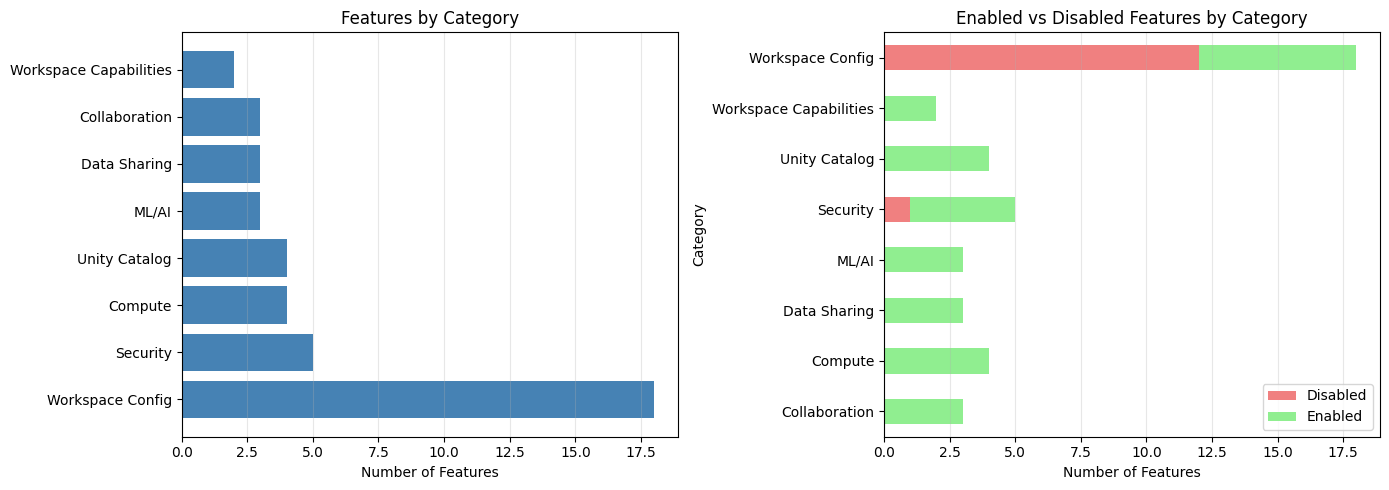


📊 Visualization complete


In [0]:
if features_df is not None:
    import matplotlib.pyplot as plt
    
    log("\n" + "="*60)
    log("FEATURE DISTRIBUTION ANALYSIS")
    log("="*60)
    
    # Create visualizations
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Chart 1: Features by Category
    category_counts = features_df.groupby('Category').size().sort_values(ascending=False)
    axes[0].barh(category_counts.index, category_counts.values, color='steelblue')
    axes[0].set_xlabel('Number of Features')
    axes[0].set_title('Features by Category')
    axes[0].grid(axis='x', alpha=0.3)
    
    # Chart 2: Enabled vs Disabled by Category
    enabled_by_category = features_df.groupby(['Category', 'Enabled']).size().unstack(fill_value=0)
    enabled_by_category.plot(kind='barh', stacked=True, ax=axes[1], 
                             color=['lightcoral', 'lightgreen'],
                             legend=True)
    axes[1].set_xlabel('Number of Features')
    axes[1].set_title('Enabled vs Disabled Features by Category')
    axes[1].legend(['Disabled', 'Enabled'], loc='lower right')
    axes[1].grid(axis='x', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    log(f"\n📊 Visualization complete")
else:
    log("⚠️  No data available for visualization")

In [0]:
if ENABLE_DELTA_EXPORT and features_df is not None:
    log("\n" + "="*60)
    log("FEATURE CHANGE DETECTION")
    log("="*60)
    
    try:
        # Check if history table exists
        previous_run = spark.sql(f"""
            SELECT * FROM {DELTA_TABLE_NAME}
            WHERE audit_timestamp < (SELECT MAX(audit_timestamp) FROM {DELTA_TABLE_NAME})
            ORDER BY audit_timestamp DESC
            LIMIT 1
        """)
        
        if previous_run.count() > 0:
            log("\nComparing with previous audit run...")
            
            # Get previous run data
            prev_df = previous_run.toPandas()
            prev_timestamp = prev_df['audit_timestamp'].iloc[0]
            
            log(f"  Previous run: {prev_timestamp}")
            log(f"  Current run: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
            
            # Compare current vs previous
            current_features = set(features_df[features_df['Enabled'] == True]['Feature'].tolist())
            previous_features = set(prev_df[prev_df['Enabled'] == True]['Feature'].tolist())
            
            # Identify changes
            newly_enabled = current_features - previous_features
            newly_disabled = previous_features - current_features
            
            log(f"\n📊 Change Summary:")
            log(f"  Features newly enabled: {len(newly_enabled)}")
            log(f"  Features newly disabled: {len(newly_disabled)}")
            log(f"  Features unchanged: {len(current_features & previous_features)}")
            
            if newly_enabled:
                log(f"\n✅ Newly Enabled Features:")
                for feature in sorted(newly_enabled):
                    feature_info = features_df[features_df['Feature'] == feature].iloc[0]
                    log(f"  + {feature} ({feature_info['Category']})")
                    log(f"    {feature_info['Description']}")
            
            if newly_disabled:
                log(f"\n❌ Newly Disabled Features:")
                for feature in sorted(newly_disabled):
                    log(f"  - {feature}")
            
            if not newly_enabled and not newly_disabled:
                log("\n✓ No feature changes detected since last run")
            
            # Store change summary
            change_summary_df = pd.DataFrame([{
                'current_timestamp': datetime.now(),
                'previous_timestamp': prev_timestamp,
                'newly_enabled_count': len(newly_enabled),
                'newly_disabled_count': len(newly_disabled),
                'newly_enabled_features': ', '.join(sorted(newly_enabled)) if newly_enabled else 'None',
                'newly_disabled_features': ', '.join(sorted(newly_disabled)) if newly_disabled else 'None'
            }])
            
        else:
            log("\nℹ️  No previous run found for comparison")
            log("   This appears to be the first audit run")
            change_summary_df = None
            
    except Exception as e:
        if 'TABLE_OR_VIEW_NOT_FOUND' in str(e):
            log("\nℹ️  Delta table not found - this is the first run")
            log(f"   Enable ENABLE_DELTA_EXPORT=True and run Cell 4 to start tracking changes")
        else:
            log(f"\n⚠️  Change detection failed: {str(e)[:100]}")
        change_summary_df = None
else:
    if not ENABLE_DELTA_EXPORT:
        log("\nℹ️  Change detection skipped (ENABLE_DELTA_EXPORT=False)")
        log("   Set ENABLE_DELTA_EXPORT=True to track feature changes over time")
    change_summary_df = None


ℹ️  Change detection skipped (ENABLE_DELTA_EXPORT=False)
   Set ENABLE_DELTA_EXPORT=True to track feature changes over time


In [0]:
if features_df is not None:
    log("\n" + "="*60)
    log("FEATURE RECOMMENDATIONS")
    log("="*60)
    
    recommendations = []
    
    # Check for important disabled features
    disabled_features = features_df[features_df['Enabled'] == False]
    
    # Recommend enabling IP Access Lists (security)
    ip_access = disabled_features[disabled_features['Feature'] == 'IP Access Lists']
    if not ip_access.empty:
        recommendations.append({
            'Priority': 'High',
            'Category': 'Security',
            'Feature': 'IP Access Lists',
            'Recommendation': 'Enable IP access lists to restrict workspace access by network',
            'Benefit': 'Enhanced network security and compliance',
            'Impact': 'Limits workspace access to approved IP ranges'
        })
    
    # Recommend enabling verbose audit logs (compliance)
    audit_logs = features_df[
        (features_df['Feature'] == 'enableVerboseAuditLogs') & 
        (features_df['Enabled'] == False)
    ]
    if not audit_logs.empty:
        recommendations.append({
            'Priority': 'High',
            'Category': 'Compliance',
            'Feature': 'Verbose Audit Logs',
            'Recommendation': 'Enable verbose audit logs for detailed compliance tracking',
            'Benefit': 'Complete audit trail for security and compliance reviews',
            'Impact': 'Captures detailed user activity and API calls'
        })
    
    # Recommend enabling user isolation (security)
    user_isolation = features_df[
        (features_df['Feature'] == 'enforceUserIsolation') & 
        (features_df['Enabled'] == False)
    ]
    if not user_isolation.empty:
        recommendations.append({
            'Priority': 'Medium',
            'Category': 'Security',
            'Feature': 'User Isolation',
            'Recommendation': 'Enable user isolation for enhanced security on shared clusters',
            'Benefit': 'Prevents users from accessing each other\'s data',
            'Impact': 'Enforces data isolation on shared compute resources'
        })
    
    # Recommend Unity Catalog if not available
    system_catalog = features_df[
        (features_df['Feature'] == 'System Catalog') & 
        (features_df['Enabled'] == False)
    ]
    if not system_catalog.empty:
        recommendations.append({
            'Priority': 'High',
            'Category': 'Data Governance',
            'Feature': 'Unity Catalog',
            'Recommendation': 'Enable Unity Catalog for centralized data governance',
            'Benefit': 'Fine-grained access control, data lineage, and audit logs',
            'Impact': 'Modern data governance with system tables for monitoring'
        })
    
    # Recommend Delta Live Tables if not used
    dlt = features_df[
        (features_df['Feature'] == 'Delta Live Tables') & 
        (features_df['Value'] == '0')
    ]
    if not dlt.empty:
        recommendations.append({
            'Priority': 'Low',
            'Category': 'Data Engineering',
            'Feature': 'Delta Live Tables',
            'Recommendation': 'Consider Delta Live Tables for declarative ETL pipelines',
            'Benefit': 'Simplified data pipeline development and maintenance',
            'Impact': 'Reduces ETL complexity with declarative SQL/Python'
        })
    
    # Recommend Model Serving if ML models exist but no serving
    models = features_df[features_df['Feature'] == 'Registered Models']
    serving = features_df[features_df['Feature'] == 'Model Serving Endpoints']
    
    if not models.empty and not serving.empty:
        model_count = int(models.iloc[0]['Value']) if models.iloc[0]['Value'].isdigit() else 0
        serving_count = int(serving.iloc[0]['Value']) if serving.iloc[0]['Value'].isdigit() else 0
        
        if model_count > 0 and serving_count == 0:
            recommendations.append({
                'Priority': 'Medium',
                'Category': 'ML/AI',
                'Feature': 'Model Serving',
                'Recommendation': f'You have {model_count} registered models but no serving endpoints',
                'Benefit': 'Deploy models as real-time REST APIs for production inference',
                'Impact': 'Enables real-time ML predictions with automatic scaling'
            })
    
    # Recommend notification destinations if none configured
    notifications = features_df[
        (features_df['Feature'] == 'Notification Destinations') & 
        (features_df['Value'] == '0')
    ]
    if not notifications.empty:
        recommendations.append({
            'Priority': 'Low',
            'Category': 'Operations',
            'Feature': 'Notification Destinations',
            'Recommendation': 'Configure notification destinations for job and pipeline alerts',
            'Benefit': 'Proactive monitoring with Slack, email, or PagerDuty integration',
            'Impact': 'Reduces downtime with immediate failure notifications'
        })
    
    # Display recommendations
    if recommendations:
        rec_df = pd.DataFrame(recommendations)
        rec_df = rec_df[['Priority', 'Category', 'Feature', 'Recommendation', 'Benefit', 'Impact']]
        
        # Sort by priority
        priority_order = {'High': 0, 'Medium': 1, 'Low': 2}
        rec_df['_sort'] = rec_df['Priority'].map(priority_order)
        rec_df = rec_df.sort_values('_sort').drop('_sort', axis=1).reset_index(drop=True)
        
        log(f"\n💡 Found {len(rec_df)} recommendations:\n")
        display(rec_df)
        
        # Summary by priority
        priority_summary = rec_df['Priority'].value_counts().sort_index()
        log(f"\n📋 Recommendations by priority:")
        for priority, count in priority_summary.items():
            log(f"  {priority}: {count}")
    else:
        log("\n✓ No feature recommendations")
        log("   Your workspace is using recommended features")
    
    log("="*60)
else:
    log("⚠️  No data available for recommendations")


FEATURE RECOMMENDATIONS

💡 Found 2 recommendations:



Priority,Category,Feature,Recommendation,Benefit,Impact
High,Security,IP Access Lists,Enable IP access lists to restrict workspace access by network,Enhanced network security and compliance,Limits workspace access to approved IP ranges
Medium,Security,User Isolation,Enable user isolation for enhanced security on shared clusters,Prevents users from accessing each other's data,Enforces data isolation on shared compute resources



📋 Recommendations by priority:
  High: 1
  Medium: 1


In [0]:
if features_df is not None:
    log("\n" + "="*60)
    log("WORKSPACE HEALTH SCORE")
    log("="*60)
    
    # Calculate health score (0-100, higher is better)
    health_score = 0
    max_score = 100
    
    # Category weights
    weights = {
        'security': 30,      # Security features (30 points)
        'governance': 25,    # Unity Catalog and data governance (25 points)
        'collaboration': 20, # Repos, jobs, pipelines (20 points)
        'ml_ai': 15,        # ML/AI capabilities (15 points)
        'operations': 10     # Monitoring, notifications (10 points)
    }
    
    # Security score (30 points max)
    security_features = features_df[features_df['Category'] == 'Security']
    if len(security_features) > 0:
        security_enabled = security_features['Enabled'].sum()
        security_total = len(security_features)
        security_score = (security_enabled / security_total) * weights['security']
        health_score += security_score
        log(f"\n🔒 Security: {security_score:.1f}/{weights['security']} points")
        log(f"   {security_enabled}/{security_total} security features enabled")
    
    # Check critical security flags
    critical_security = [
        ('enableVerboseAuditLogs', 'Verbose audit logs'),
        ('enableIpAccessLists', 'IP access lists'),
        ('enforceUserIsolation', 'User isolation')
    ]
    
    security_issues = []
    for feature_key, feature_name in critical_security:
        feature_row = features_df[features_df['Feature'] == feature_key]
        if not feature_row.empty and not feature_row.iloc[0]['Enabled']:
            security_issues.append(feature_name)
    
    if security_issues:
        log(f"   ⚠️  Missing: {', '.join(security_issues)}")
    
    # Governance score (25 points max)
    uc_features = features_df[features_df['Category'] == 'Unity Catalog']
    if len(uc_features) > 0:
        uc_enabled = uc_features['Enabled'].sum()
        uc_total = len(uc_features)
        governance_score = (uc_enabled / uc_total) * weights['governance']
        health_score += governance_score
        log(f"\n📚 Data Governance: {governance_score:.1f}/{weights['governance']} points")
        log(f"   {uc_enabled}/{uc_total} Unity Catalog features enabled")
    
    # Collaboration score (20 points max)
    collab_features = features_df[features_df['Category'] == 'Collaboration']
    if len(collab_features) > 0:
        collab_enabled = collab_features['Enabled'].sum()
        collab_total = len(collab_features)
        collaboration_score = (collab_enabled / collab_total) * weights['collaboration']
        health_score += collaboration_score
        log(f"\n🤝 Collaboration: {collaboration_score:.1f}/{weights['collaboration']} points")
        log(f"   {collab_enabled}/{collab_total} collaboration features enabled")
    
    # ML/AI score (15 points max)
    ml_features = features_df[features_df['Category'] == 'ML/AI']
    if len(ml_features) > 0:
        ml_enabled = ml_features['Enabled'].sum()
        ml_total = len(ml_features)
        ml_score = (ml_enabled / ml_total) * weights['ml_ai']
        health_score += ml_score
        log(f"\n🤖 ML/AI: {ml_score:.1f}/{weights['ml_ai']} points")
        log(f"   {ml_enabled}/{ml_total} ML/AI features enabled")
    
    # Operations score (10 points max)
    ops_features = features_df[features_df['Category'] == 'Workspace Capabilities']
    if len(ops_features) > 0:
        ops_enabled = ops_features['Enabled'].sum()
        ops_total = len(ops_features)
        operations_score = (ops_enabled / ops_total) * weights['operations']
        health_score += operations_score
        log(f"\n⚙️  Operations: {operations_score:.1f}/{weights['operations']} points")
        log(f"   {ops_enabled}/{ops_total} operational features enabled")
    
    # Determine health level
    if health_score >= 90:
        health_level = 'EXCELLENT'
        health_emoji = '🟢'
    elif health_score >= 75:
        health_level = 'GOOD'
        health_emoji = '🟢'
    elif health_score >= 60:
        health_level = 'FAIR'
        health_emoji = '🟡'
    elif health_score >= 40:
        health_level = 'NEEDS IMPROVEMENT'
        health_emoji = '🟠'
    else:
        health_level = 'POOR'
        health_emoji = '🔴'
    
    log(f"\n{'='*60}")
    log(f"{health_emoji} OVERALL WORKSPACE HEALTH SCORE: {health_score:.1f}/100 ({health_level})")
    log(f"{'='*60}")
    
    # Store for export
    workspace_health_score = health_score
    workspace_health_level = health_level
else:
    log("⚠️  Cannot calculate health score - no feature data available")
    workspace_health_score = None
    workspace_health_level = None


WORKSPACE HEALTH SCORE

🔒 Security: 24.0/30 points
   4/5 security features enabled
   ⚠️  Missing: IP access lists, User isolation

📚 Data Governance: 25.0/25 points
   4/4 Unity Catalog features enabled

🤝 Collaboration: 20.0/20 points
   3/3 collaboration features enabled

🤖 ML/AI: 15.0/15 points
   3/3 ML/AI features enabled

⚙️  Operations: 10.0/10 points
   2/2 operational features enabled

🟢 OVERALL WORKSPACE HEALTH SCORE: 94.0/100 (EXCELLENT)


In [0]:
if features_df is not None and ENABLE_EXCEL_EXPORT:
    log("\n" + "="*60)
    log("ENHANCED EXCEL EXPORT WITH SUMMARY DASHBOARD")
    log("="*60)
    
    try:
        import os
        import tempfile
        
        # Use temp directory for serverless compatibility
        temp_dir = tempfile.mkdtemp()
        timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
        temp_excel_file = f"{temp_dir}/workspace_features_{timestamp}.xlsx"
        
        log(f"\nCreating Excel workbook with 8 sheets...")
        
        # Prepare all sheets
        with pd.ExcelWriter(temp_excel_file, engine='openpyxl') as writer:
            
            # Sheet 1: Executive Summary Dashboard
            exec_summary_data = []
            
            # Overall metrics
            exec_summary_data.append({'Metric': 'Total Features Checked', 'Value': len(features_df)})
            exec_summary_data.append({'Metric': 'Features Enabled', 'Value': int(features_df['Enabled'].sum())})
            exec_summary_data.append({'Metric': 'Features Disabled', 'Value': len(features_df) - int(features_df['Enabled'].sum())})
            exec_summary_data.append({'Metric': 'Enablement Rate (%)', 'Value': f"{(features_df['Enabled'].sum() / len(features_df) * 100):.1f}%"})
            
            # Health score
            if 'workspace_health_score' in locals() and workspace_health_score is not None:
                exec_summary_data.append({'Metric': 'Workspace Health Score', 'Value': f"{workspace_health_score:.1f}/100 ({workspace_health_level})"})
            
            # Execution metrics
            exec_summary_data.append({'Metric': 'Execution Time (seconds)', 'Value': f"{execution_time:.2f}"})
            exec_summary_data.append({'Metric': 'API Calls', 'Value': execution_stats['api_calls']})
            exec_summary_data.append({'Metric': 'API Failures', 'Value': execution_stats['api_failures']})
            exec_summary_data.append({'Metric': 'Success Rate (%)', 'Value': f"{((execution_stats['api_calls'] - execution_stats['api_failures']) / execution_stats['api_calls'] * 100):.1f}" if execution_stats['api_calls'] > 0 else 'N/A'})
            
            # Environment
            exec_summary_data.append({'Metric': 'Compute Type', 'Value': 'Serverless' if IS_SERVERLESS else 'Traditional Cluster'})
            exec_summary_data.append({'Metric': 'Execution Mode', 'Value': 'Full Mode' if USE_FULL_MODE else 'Quick Mode'})
            exec_summary_data.append({'Metric': 'Audit Timestamp', 'Value': datetime.now().strftime('%Y-%m-%d %H:%M:%S')})
            
            pd.DataFrame(exec_summary_data).to_excel(writer, sheet_name='Executive Summary', index=False)
            log("  ✓ Sheet 1: Executive Summary")
            
            # Sheet 2: Features by Category
            category_summary = features_df.groupby('Category').agg({
                'Feature': 'count',
                'Enabled': 'sum'
            }).rename(columns={'Feature': 'Total', 'Enabled': 'Enabled'})
            category_summary['Disabled'] = category_summary['Total'] - category_summary['Enabled']
            category_summary['Enablement Rate (%)'] = (category_summary['Enabled'] / category_summary['Total'] * 100).round(1)
            category_summary.to_excel(writer, sheet_name='Features by Category')
            log("  ✓ Sheet 2: Features by Category")
            
            # Sheet 3: All Features (detailed)
            features_df.to_excel(writer, sheet_name='All Features', index=False)
            log("  ✓ Sheet 3: All Features")
            
            # Sheet 4: Enabled Features Only
            enabled_features = features_df[features_df['Enabled'] == True]
            enabled_features.to_excel(writer, sheet_name='Enabled Features', index=False)
            log(f"  ✓ Sheet 4: Enabled Features ({len(enabled_features)} features)")
            
            # Sheet 5: Disabled Features Only
            disabled_features_export = features_df[features_df['Enabled'] == False]
            disabled_features_export.to_excel(writer, sheet_name='Disabled Features', index=False)
            log(f"  ✓ Sheet 5: Disabled Features ({len(disabled_features_export)} features)")
            
            # Sheet 6: Recommendations (if available)
            if 'rec_df' in locals() and rec_df is not None and len(rec_df) > 0:
                rec_df.to_excel(writer, sheet_name='Recommendations', index=False)
                log(f"  ✓ Sheet 6: Recommendations ({len(rec_df)} items)")
            else:
                pd.DataFrame([{'Note': 'No recommendations available'}]).to_excel(writer, sheet_name='Recommendations', index=False)
                log("  ✓ Sheet 6: Recommendations (none)")
            
            # Sheet 7: Change Summary (if available)
            if 'change_summary_df' in locals() and change_summary_df is not None:
                change_summary_df.to_excel(writer, sheet_name='Change Summary', index=False)
                log("  ✓ Sheet 7: Change Summary")
            else:
                pd.DataFrame([{'Note': 'Enable ENABLE_DELTA_EXPORT to track changes'}]).to_excel(writer, sheet_name='Change Summary', index=False)
                log("  ✓ Sheet 7: Change Summary (not available)")
            
            # Sheet 8: Execution Metadata
            metadata = pd.DataFrame([{
                'Execution Date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
                'Execution Mode': 'Job' if IS_JOB_MODE else 'Interactive',
                'Compute Type': 'Serverless' if IS_SERVERLESS else 'Traditional',
                'Full Mode': USE_FULL_MODE,
                'Total Execution Time (s)': f"{execution_time:.2f}",
                'API Calls': execution_stats['api_calls'],
                'API Failures': execution_stats['api_failures'],
                'API Retries': execution_stats['api_retries'],
                'Success Rate (%)': f"{((execution_stats['api_calls'] - execution_stats['api_failures']) / execution_stats['api_calls'] * 100):.1f}" if execution_stats['api_calls'] > 0 else 'N/A',
                'Features Found': len(features_df),
                'Features Enabled': int(features_df['Enabled'].sum())
            }])
            metadata.to_excel(writer, sheet_name='Execution Metadata', index=False)
            log("  ✓ Sheet 8: Execution Metadata")
        
        # Copy to DBFS if needed
        try:
            dbutils.fs.mkdirs(EXPORT_PATH.replace('/dbfs', 'dbfs:'))
            final_path = f"{EXPORT_PATH}/workspace_features_{timestamp}.xlsx"
            dbutils.fs.cp(f"file:{temp_excel_file}", final_path.replace('/dbfs', 'dbfs:'))
            excel_file = final_path
            log(f"  ✓ Copied to DBFS: {final_path}")
        except:
            excel_file = temp_excel_file
            log(f"  ℹ️  Saved to local temp: {temp_excel_file}")
        
        file_size_kb = os.path.getsize(temp_excel_file) / 1024
        log(f"\n✓ Enhanced Excel export complete!")
        log(f"  File: {excel_file}")
        log(f"  Sheets: 8")
        log(f"  Size: {file_size_kb:.1f} KB")
        log(f"\n📊 Open the file to view the executive dashboard and detailed feature analysis")
        
    except Exception as e:
        log_error(f"Enhanced Excel export failed: {str(e)}")
        import traceback
        if not IS_JOB_MODE:
            log(f"\nError details: {traceback.format_exc()[:500]}")
elif features_df is None:
    log("⚠️  Skipping enhanced export: No data to export")
else:
    log("ℹ️  Enhanced Excel export disabled (ENABLE_EXCEL_EXPORT=False)")
    log("   Set ENABLE_EXCEL_EXPORT=True in Cell 2 to enable")


ENHANCED EXCEL EXPORT WITH SUMMARY DASHBOARD

Creating Excel workbook with 8 sheets...
  ✓ Sheet 1: Executive Summary
  ✓ Sheet 2: Features by Category
  ✓ Sheet 3: All Features
  ✓ Sheet 4: Enabled Features (29 features)
  ✓ Sheet 5: Disabled Features (13 features)
  ✓ Sheet 6: Recommendations (2 items)
  ✓ Sheet 7: Change Summary (not available)
  ✓ Sheet 8: Execution Metadata


{"ts": "2026-02-12 18:19:02.858", "level": "ERROR", "logger": "pyspark.sql.connect.logging", "msg": "GRPC Error received", "context": {}, "exception": {"class": "_MultiThreadedRendezvous", "msg": "<_MultiThreadedRendezvous of RPC that terminated with:\n\tstatus = StatusCode.INTERNAL\n\tdetails = \"Cannot use com.databricks.backend.daemon.driver.WorkspaceLocalFileSystem - local filesystem access is forbidden\"\n\tdebug_error_string = \"UNKNOWN:Error received from peer  {created_time:\"2026-02-12T18:19:02.857466878+00:00\", grpc_status:13, grpc_message:\"Cannot use com.databricks.backend.daemon.driver.WorkspaceLocalFileSystem - local filesystem access is forbidden\"}\"\n>", "stacktrace": [{"class": null, "method": "_execute_and_fetch_as_iterator", "file": "/databricks/python/lib/python3.12/site-packages/pyspark/sql/connect/client/core.py", "line": "2019"}, {"class": null, "method": "__next__", "file": "<frozen _collections_abc>", "line": "356"}, {"class": null, "method": "send", "file": 

  ℹ️  Saved to local temp: /tmp/tmpwvv1u3h_/workspace_features_20260212_181902.xlsx

✓ Enhanced Excel export complete!
  File: /tmp/tmpwvv1u3h_/workspace_features_20260212_181902.xlsx
  Sheets: 8
  Size: 14.1 KB

📊 Open the file to view the executive dashboard and detailed feature analysis


In [0]:
# JSON export for API integration and programmatic access
ENABLE_JSON_EXPORT = False  # Set to True to enable JSON export

if features_df is not None and ENABLE_JSON_EXPORT:
    log("\n" + "="*60)
    log("JSON EXPORT")
    log("="*60)
    
    try:
        import json
        
        # Create export directory
        dbutils.fs.mkdirs(EXPORT_PATH.replace('/dbfs', 'dbfs:'))
        
        timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
        json_file = f"{EXPORT_PATH}/workspace_features_{timestamp}.json"
        
        # Prepare JSON structure
        export_data = {
            'metadata': {
                'audit_timestamp': datetime.now().isoformat(),
                'execution_mode': 'Job' if IS_JOB_MODE else 'Interactive',
                'compute_type': 'Serverless' if IS_SERVERLESS else 'Traditional',
                'full_mode': USE_FULL_MODE,
                'execution_time_seconds': execution_time,
                'api_calls': execution_stats['api_calls'],
                'api_failures': execution_stats['api_failures'],
                'success_rate': f"{((execution_stats['api_calls'] - execution_stats['api_failures']) / execution_stats['api_calls'] * 100):.1f}%" if execution_stats['api_calls'] > 0 else 'N/A'
            },
            'summary': {
                'total_features': len(features_df),
                'enabled_features': int(features_df['Enabled'].sum()),
                'disabled_features': len(features_df) - int(features_df['Enabled'].sum()),
                'enablement_rate': f"{(features_df['Enabled'].sum() / len(features_df) * 100):.1f}%"
            },
            'health_score': {
                'score': workspace_health_score if 'workspace_health_score' in locals() else None,
                'level': workspace_health_level if 'workspace_health_level' in locals() else None
            },
            'features_by_category': {},
            'all_features': features_df.to_dict('records')
        }
        
        # Add category breakdown
        for category in features_df['Category'].unique():
            cat_features = features_df[features_df['Category'] == category]
            export_data['features_by_category'][category] = {
                'total': len(cat_features),
                'enabled': int(cat_features['Enabled'].sum()),
                'features': cat_features.to_dict('records')
            }
        
        # Write JSON file
        with open(json_file, 'w') as f:
            json.dump(export_data, f, indent=2, default=str)
        
        log(f"\n✓ JSON export complete: {json_file}")
        log(f"  File size: {os.path.getsize(json_file) / 1024:.1f} KB")
        
    except Exception as e:
        log_error(f"JSON export failed: {str(e)}")
elif features_df is None:
    log("⚠️  Skipping JSON export: No data to export")
else:
    log("ℹ️  JSON export disabled (ENABLE_JSON_EXPORT=False)")
    log("   Set ENABLE_JSON_EXPORT=True in this cell to enable")

ℹ️  JSON export disabled (ENABLE_JSON_EXPORT=False)
   Set ENABLE_JSON_EXPORT=True in this cell to enable


In [0]:
# Uncomment this cell to add job parameter widgets for runtime configuration
# This allows you to override settings when running as a scheduled job

# dbutils.widgets.dropdown("use_full_mode", "true", ["true", "false"], "Use Full Mode")
# dbutils.widgets.dropdown("enable_excel_export", "false", ["true", "false"], "Enable Excel Export")
# dbutils.widgets.dropdown("enable_delta_export", "false", ["true", "false"], "Enable Delta Export")
# dbutils.widgets.text("max_workers", "10", "Max Workers")
# dbutils.widgets.dropdown("enable_cluster_check", "false", ["true", "false"], "Enable Cluster Check (Slow)")

# To use these parameters, add this code to Cell 2 (Configuration) after the initial settings:
# try:
#     USE_FULL_MODE = dbutils.widgets.get("use_full_mode").lower() == "true"
#     ENABLE_EXCEL_EXPORT = dbutils.widgets.get("enable_excel_export").lower() == "true"
#     ENABLE_DELTA_EXPORT = dbutils.widgets.get("enable_delta_export").lower() == "true"
#     MAX_WORKERS = int(dbutils.widgets.get("max_workers"))
#     ENABLE_CLUSTER_CHECK = dbutils.widgets.get("enable_cluster_check").lower() == "true"
#     log("✓ Using job parameter overrides")
# except:
#     log("ℹ️  Using default configuration (no job parameters)")

log("ℹ️  Job parameter widgets are commented out")
log("   Uncomment the code in this cell to enable runtime configuration")

ℹ️  Job parameter widgets are commented out
   Uncomment the code in this cell to enable runtime configuration
